# Проверка гипотез

Описание проекта:
Работаем в качестве аналитика компании «убертелеком» —  оператора сотовой связи. Клиентам предлагают два тарифных плана: «смарт» и «Ультра». Чтобы скорректировать рекламный бюджет,  департамент хочет понять, какой тариф приносит больше денег.
Стоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «убертелеком»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

# Оглавление:
1. [Открытие данных](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
2. [Предобработка данных](#Шаг-2.-Предобработка-данных)
3. [Анализ полученных данных](#Шаг-3.-Анализ-полученных-данных)
4. [Проверка гипотез](#Шаг-4-проверка-гипотез)
5. [Общий вывод](#Общий-вывод)

# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as math

## Шаг 1. Открытие файла с данными и изучение общей информации

In [2]:
df_calls=pd.read_csv('/datasets/calls.csv')
df_internet=pd.read_csv('/datasets/internet.csv')
df_sms=pd.read_csv('/datasets/messages.csv')
df_tarif=pd.read_csv('/datasets/tariffs.csv')
df_users=pd.read_csv('/datasets/users.csv')

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df_calls.duplicated().sum()

0

In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [6]:
df_internet.duplicated().sum()

0

In [7]:
df_sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [8]:
df_internet.duplicated().sum()

0

In [9]:
df_tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [10]:
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [11]:
df_users.duplicated().sum()

0

In [12]:
display(df_calls,df_internet,df_sms,df_tarif,df_users)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


---


## Шаг 2.Предобработка данных

Разберемся с типами данных в каждой таблице:

Начнем со звонков

In [13]:
df_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [14]:
df_calls.isnull().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [15]:
df_calls['duration'].value_counts()


0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

на 202607 значений -39613 0 звоники, которые могут являться пропущенными/случайно сброшенными/входящими и составляют 20 процентов

нулевых  значений нет

Нас интересуют месяца и округление длительности звокнов до минут - принцип Мегалайна

In [16]:
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y-%m-%dT%H:%M:%S')
df_calls['month']=df_calls['call_date'].dt.month
df_calls

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499,12
202603,1499_216,2018-10-18,18.83,1499,10
202604,1499_217,2018-11-10,10.81,1499,11
202605,1499_218,2018-10-06,4.27,1499,10


методом np ceil округлим до верха значения длительности

In [17]:
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])
df_calls['duration_rounded']

0          0.0
1          0.0
2          3.0
3         14.0
4          6.0
          ... 
202602     1.0
202603    19.0
202604    11.0
202605     5.0
202606    20.0
Name: duration_rounded, Length: 202607, dtype: float64

In [18]:
df_calls.groupby(['user_id'])['call_date'].count()
df_calls.isnull().sum()

id                  0
call_date           0
duration            0
user_id             0
month               0
duration_rounded    0
dtype: int64

возьмем перв

In [19]:
df_calls_final=df_calls.groupby(['user_id','month']).agg({
    'duration_rounded':'sum',
    
})

In [20]:
df_calls_final

duration_rounded
user_id month                  
1000    5                 159.0
        6                 172.0
        7                 340.0
        8                 408.0
        9                 466.0
...                         ...
1498    10                247.0
1499    9                  70.0
        10                449.0
        11                612.0
        12                492.0

[3174 rows x 1 columns]

Разберем данные по интернету:

переведем мб в гигабайты.

In [21]:
df_internet['mb_used']=np.ceil(df_internet['mb_used'])
df_internet['gb_used']=df_internet['mb_used']/1024

display(df_internet)



,Unnamed: 0,id,mb_used,session_date,user_id,gb_used
0,0,1000_0,113.0,2018-11-25,1000,0.110352
1,1,1000_1,1053.0,2018-09-07,1000,1.028320
2,2,1000_2,1198.0,2018-06-25,1000,1.169922
3,3,1000_3,551.0,2018-08-22,1000,0.538086
4,4,1000_4,303.0,2018-09-24,1000,0.295898
...,...,...,...,...,...,...
149391,149391,1499_152,319.0,2018-10-03,1499,0.311523
149392,149392,1499_153,491.0,2018-12-14,1499,0.479492
149393,149393,1499_154,0.0,2018-10-27,1499,0.000000
149394,149394,1499_155,1247.0,2018-11-26,1499,1.217773


In [22]:
df_internet['gb_used'].value_counts()

0.000000    19598
0.325195      231
0.373047      228
0.368164      224
0.247070      222
            ...  
1.383789        1
1.316406        1
1.292969        1
1.310547        1
1.263672        1
Name: gb_used, Length: 1424, dtype: int64

на 149396 19598 нулевых значений использвоания интернета , соотношение нормальное, люди могут просто не пользоваться интернетом

In [23]:
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y-%m-%dT%H:%M:%S')
df_internet['month']=df_internet['session_date'].dt.month

In [24]:
df_internet.groupby(['user_id','month']).agg({
    'gb_used':['sum'],
    
})

gb_used
                     sum
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

In [25]:
df_internet_final=df_internet.groupby(['user_id','month']).agg({
    'gb_used':'sum',
    
})


In [26]:
df_internet_final

gb_used
user_id month           
1000    5       2.203125
        6      22.711914
        7      13.687500
        8      13.740234
        9      14.239258
...                  ...
1498    10     20.121094
1499    9       1.804688
        10     17.391602
        11     17.562500
        12     12.770508

[3203 rows x 1 columns]

перейдем к смс

In [27]:
df_sms.isnull().sum()

id              0
message_date    0
user_id         0
dtype: int64

Количество сообщений можно посчитать по id

In [28]:
df_sms['message_date']=pd.to_datetime(df_sms['message_date'],format='%Y-%m-%dT%H:%M:%S')
df_sms['month']=df_sms['message_date'].dt.month

In [29]:
df_sms['month'].value_counts()

12    20555
11    18244
10    17114
9     14759
8     13088
7     11320
6      8983
5      7298
4      5179
3      3648
2      1924
1       924
Name: month, dtype: int64

In [30]:
df_sms_final=df_sms.groupby(['user_id','month']).agg({'id':'count'})

Соединим получившиеся таблицы

In [31]:
df_pre_final=df_internet_final.merge(df_calls_final,on=['user_id','month'],how='outer')


In [32]:
df_pre_final

gb_used  duration_rounded
user_id month                             
1000    5       2.203125             159.0
        6      22.711914             172.0
        7      13.687500             340.0
        8      13.740234             408.0
        9      14.239258             466.0
...                  ...               ...
1273    11           NaN             272.0
        12           NaN             260.0
1377    2            NaN             179.0
1392    2            NaN              13.0
1446    8            NaN              50.0

[3214 rows x 2 columns]

In [33]:
df_final=df_pre_final.merge(df_sms_final,on=['user_id','month'],how='outer')

In [34]:
df_final=df_final.rename(columns={'id':'messages'})

In [35]:
df_final

gb_used  duration_rounded  messages
user_id month                                       
1000    5       2.203125             159.0      22.0
        6      22.711914             172.0      60.0
        7      13.687500             340.0      75.0
        8      13.740234             408.0      81.0
        9      14.239258             466.0      57.0
...                  ...               ...       ...
1273    11           NaN             272.0      29.0
        12           NaN             260.0      39.0
1377    2            NaN             179.0       2.0
1392    2            NaN              13.0       3.0
1446    8            NaN              50.0       1.0

[3214 rows x 3 columns]

In [36]:
df_final.isnull().sum()

gb_used              11
duration_rounded     40
messages            497
dtype: int64

In [37]:
df_final=df_final.fillna(0)

497 раз некоторые пользователи могли не пользоваться смс вовсе
а 40 раз не звонить в течение  месяца ( уезжать в отпуск и отключать тариф),11 раз также интернет в течение месяца мог не использоваться

в таблице users нас NaN значения не интересуют так как люди все еще пользуются тарифом и значит считаем их записавшимися до декабря

In [38]:
df_final.isnull().sum()

gb_used             0
duration_rounded    0
messages            0
dtype: int64

In [39]:
df_final=df_final.groupby(['user_id','month']).sum()

In [40]:
df_final.head(20)

gb_used  duration_rounded  messages
user_id month                                       
1000    5       2.203125             159.0      22.0
        6      22.711914             172.0      60.0
        7      13.687500             340.0      75.0
        8      13.740234             408.0      81.0
        9      14.239258             466.0      57.0
        10     14.372070             350.0      73.0
        11     14.421875             338.0      58.0
        12      9.596680             333.0      70.0
1001    11     18.019531             430.0       0.0
        12     13.723633             414.0       0.0
1002    6      10.616211             117.0       4.0
        7      17.188477             214.0      11.0
        8      19.870117             289.0      13.0
        9      16.320312             206.0       4.0
        10     13.579102             212.0      10.0
        11     18.173828             243.0      16.0
        12     17.711914             236.0      12.0
1003    8       8.370117             380.0      37.0
        9      12.186523             961.0      91.0
        10     14.432617             855.0      83.0

Осталось ко всему этому посчитать нужные нам цены:

In [41]:
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y-%m-%dT%H:%M:%S')
df_users['month_start']=df_users['reg_date'].dt.month


In [42]:
df_finally=df_final.merge(df_users,on=['user_id'],how='left')

In [43]:
df_finally=df_finally.drop(['age','first_name','last_name','city'],axis=1)

In [44]:
df_finally=df_finally.drop(['churn_date'],axis=1)

In [45]:
df_finally

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start
0,1000,2.203125,159.0,22.0,2018-05-25,ultra,5
1,1000,22.711914,172.0,60.0,2018-05-25,ultra,5
2,1000,13.687500,340.0,75.0,2018-05-25,ultra,5
3,1000,13.740234,408.0,81.0,2018-05-25,ultra,5
4,1000,14.239258,466.0,57.0,2018-05-25,ultra,5
...,...,...,...,...,...,...,...
3209,1498,20.121094,247.0,42.0,2018-07-19,smart,7
3210,1499,1.804688,70.0,11.0,2018-09-27,smart,9
3211,1499,17.391602,449.0,48.0,2018-09-27,smart,9
3212,1499,17.562500,612.0,59.0,2018-09-27,smart,9


In [46]:
df_finally['month_payment'] = df_finally.month_start.apply(lambda i : i if i < 0 else 1)
df_finally

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start,month_payment
0,1000,2.203125,159.0,22.0,2018-05-25,ultra,5,1
1,1000,22.711914,172.0,60.0,2018-05-25,ultra,5,1
2,1000,13.687500,340.0,75.0,2018-05-25,ultra,5,1
3,1000,13.740234,408.0,81.0,2018-05-25,ultra,5,1
4,1000,14.239258,466.0,57.0,2018-05-25,ultra,5,1
...,...,...,...,...,...,...,...,...
3209,1498,20.121094,247.0,42.0,2018-07-19,smart,7,1
3210,1499,1.804688,70.0,11.0,2018-09-27,smart,9,1
3211,1499,17.391602,449.0,48.0,2018-09-27,smart,9,1
3212,1499,17.562500,612.0,59.0,2018-09-27,smart,9,1


Month_start-по своекй сущности значение в виде разовой оплаты юзера в разные месяца

In [47]:
df_finally.isnull().sum()

user_id             0
gb_used             0
duration_rounded    0
messages            0
reg_date            0
tariff              0
month_start         0
month_payment       0
dtype: int64

In [48]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [49]:
df_final.head(20)

gb_used  duration_rounded  messages
user_id month                                       
1000    5       2.203125             159.0      22.0
        6      22.711914             172.0      60.0
        7      13.687500             340.0      75.0
        8      13.740234             408.0      81.0
        9      14.239258             466.0      57.0
        10     14.372070             350.0      73.0
        11     14.421875             338.0      58.0
        12      9.596680             333.0      70.0
1001    11     18.019531             430.0       0.0
        12     13.723633             414.0       0.0
1002    6      10.616211             117.0       4.0
        7      17.188477             214.0      11.0
        8      19.870117             289.0      13.0
        9      16.320312             206.0       4.0
        10     13.579102             212.0      10.0
        11     18.173828             243.0      16.0
        12     17.711914             236.0      12.0
1003    8       8.370117             380.0      37.0
        9      12.186523             961.0      91.0
        10     14.432617             855.0      83.0

In [50]:
df_final.rename(columns={'id':'messages'}, inplace=True) 

In [51]:
df_final

gb_used  duration_rounded  messages
user_id month                                       
1000    5       2.203125             159.0      22.0
        6      22.711914             172.0      60.0
        7      13.687500             340.0      75.0
        8      13.740234             408.0      81.0
        9      14.239258             466.0      57.0
...                  ...               ...       ...
1498    10     20.121094             247.0      42.0
1499    9       1.804688              70.0      11.0
        10     17.391602             449.0      48.0
        11     17.562500             612.0      59.0
        12     12.770508             492.0      66.0

[3214 rows x 3 columns]

In [52]:
df_tarif['gb_per_month_included']=df_tarif['mb_per_month_included']/1024

In [53]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [54]:
df_finally

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start,month_payment
0,1000,2.203125,159.0,22.0,2018-05-25,ultra,5,1
1,1000,22.711914,172.0,60.0,2018-05-25,ultra,5,1
2,1000,13.687500,340.0,75.0,2018-05-25,ultra,5,1
3,1000,13.740234,408.0,81.0,2018-05-25,ultra,5,1
4,1000,14.239258,466.0,57.0,2018-05-25,ultra,5,1
...,...,...,...,...,...,...,...,...
3209,1498,20.121094,247.0,42.0,2018-07-19,smart,7,1
3210,1499,1.804688,70.0,11.0,2018-09-27,smart,9,1
3211,1499,17.391602,449.0,48.0,2018-09-27,smart,9,1
3212,1499,17.562500,612.0,59.0,2018-09-27,smart,9,1


In [55]:
df_finally['duration_rounded']=df_finally['duration_rounded'].astype('int')
df_finally['gb_used']=np.ceil(df_finally['gb_used'])

df_finally['messages']=df_finally['messages'].astype('int')
df_finally

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start,month_payment
0,1000,3.0,159,22,2018-05-25,ultra,5,1
1,1000,23.0,172,60,2018-05-25,ultra,5,1
2,1000,14.0,340,75,2018-05-25,ultra,5,1
3,1000,14.0,408,81,2018-05-25,ultra,5,1
4,1000,15.0,466,57,2018-05-25,ultra,5,1
...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,2018-07-19,smart,7,1
3210,1499,2.0,70,11,2018-09-27,smart,9,1
3211,1499,18.0,449,48,2018-09-27,smart,9,1
3212,1499,18.0,612,59,2018-09-27,smart,9,1


In [76]:
df_tarif

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,gb_per_month_included
0,50,15360,500,550,200,3,3,smart,15.0
1,1000,30720,3000,1950,150,1,1,ultra,30.0


In [77]:
df_finally['tariff_name']=df_finally['tariff']

In [78]:
df_finally.drop('tariff',axis=1)

,user_id,gb_used,duration_rounded,messages,reg_date,month_start,month_payment,tariff_name
0,1000,3.0,159,22,2018-05-25,5,1,ultra
1,1000,23.0,172,60,2018-05-25,5,1,ultra
2,1000,14.0,340,75,2018-05-25,5,1,ultra
3,1000,14.0,408,81,2018-05-25,5,1,ultra
4,1000,15.0,466,57,2018-05-25,5,1,ultra
...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,2018-07-19,7,1,smart
3210,1499,2.0,70,11,2018-09-27,9,1,smart
3211,1499,18.0,449,48,2018-09-27,9,1,smart
3212,1499,18.0,612,59,2018-09-27,9,1,smart


In [79]:
df_finally_with_tarif=df_finally.merge(df_tarif,on='tariff_name',how='left')

In [80]:
df_1=df_finally_with_tarif

In [81]:
df_1

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start,month_payment,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included
0,1000,3.0,159,22,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
1,1000,23.0,172,60,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
2,1000,14.0,340,75,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
3,1000,14.0,408,81,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
4,1000,15.0,466,57,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,2018-07-19,smart,7,1,smart,50,15360,500,550,200,3,3,15.0
3210,1499,2.0,70,11,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0
3211,1499,18.0,449,48,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0
3212,1499,18.0,612,59,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0


сделаем функцию для подсчета итоговых значений с которыми будем работать:

In [82]:
def month_calc(row):
    
    calls = row['duration_rounded']
    messages=row['messages']
    internet=row['gb_used']
    tariff = row['tariff']
    
    minutes_lim = df_tarif.loc[df_tarif['tariff_name'] == tariff, 'minutes_included'].array[0]
    messages_lim=df_tarif.loc[df_tarif['tariff_name']==tariff,'messages_included'].array[0]
    internet_lim=df_tarif.loc[df_tarif['tariff_name']==tariff, 'gb_per_month_included'].array[0]
   
    call_overlimit = max(calls - minutes_lim, 0)
    call_overpay = call_overlimit * df_tarif.loc[df_tarif['tariff_name'] == tariff, 'rub_per_minute'].array[0]
    internet_overlimit=max(internet-internet_lim,0)
    
    messages_overlimit=max(messages-messages_lim,0)
    messages_overpay=messages_overlimit  * df_tarif.loc[df_tarif['tariff_name']==tariff, 'rub_per_message'].array[0]
    internet_overpay=internet_overlimit * df_tarif.loc[df_tarif['tariff_name']==tariff,'rub_per_gb'].array[0]
    return call_overlimit+messages_overpay+internet_overpay+df_tarif.loc[df_tarif['tariff_name'] == tariff, 'rub_monthly_fee'].array[0]
df_function=df_1.apply(month_calc,axis=1)

    

In [83]:
df_1['final_price']=df_function

In [84]:
df_function

0       1950.0
1       1950.0
2       1950.0
3       1950.0
4       1950.0
         ...  
3209    1750.0
3210     550.0
3211    1150.0
3212    1289.0
3213     598.0
Length: 3214, dtype: float64

In [85]:
df_1

,user_id,gb_used,duration_rounded,messages,reg_date,tariff,month_start,month_payment,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,gb_per_month_included,final_price
0,1000,3.0,159,22,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
1,1000,23.0,172,60,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
2,1000,14.0,340,75,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
3,1000,14.0,408,81,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
4,1000,15.0,466,57,2018-05-25,ultra,5,1,ultra,1000,30720,3000,1950,150,1,1,30.0,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,2018-07-19,smart,7,1,smart,50,15360,500,550,200,3,3,15.0,1750.0
3210,1499,2.0,70,11,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,550.0
3211,1499,18.0,449,48,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,1150.0
3212,1499,18.0,612,59,2018-09-27,smart,9,1,smart,50,15360,500,550,200,3,3,15.0,1289.0


почистим от лишних столбцов

In [86]:
df_1=df_1.drop([
    'reg_date','messages_included','tariff_name','mb_per_month_included','minutes_included','rub_per_message','gb_per_month_included'
],axis=1)

In [87]:
df_1=df_1.drop(['rub_per_gb','rub_per_minute'],axis=1)

In [88]:
df_1

,user_id,gb_used,duration_rounded,messages,tariff,month_start,month_payment,rub_monthly_fee,final_price
0,1000,3.0,159,22,ultra,5,1,1950,1950.0
1,1000,23.0,172,60,ultra,5,1,1950,1950.0
2,1000,14.0,340,75,ultra,5,1,1950,1950.0
3,1000,14.0,408,81,ultra,5,1,1950,1950.0
4,1000,15.0,466,57,ultra,5,1,1950,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,smart,7,1,550,1750.0
3210,1499,2.0,70,11,smart,9,1,550,550.0
3211,1499,18.0,449,48,smart,9,1,550,1150.0
3212,1499,18.0,612,59,smart,9,1,550,1289.0


с этой таблицей И будем работать. напомню,month_payment= разовость платежа

##  Шаг 3. Анализ полученных данных

In [89]:
df_1_for_math=df_1.drop(['month_payment','rub_monthly_fee'],axis=1)

In [90]:
df_1_for_math.mean()

user_id             1251.590230
gb_used               17.329807
duration_rounded     451.244866
messages              38.281269
month_start            4.719042
final_price         1474.882701
dtype: float64

### выведем средние значения для всех пользователей по тарифам

In [91]:
df_smart=df_1_for_math.query('tariff == "smart"')

In [92]:
df_smart

,user_id,gb_used,duration_rounded,messages,tariff,month_start,final_price
8,1001,19.0,430,0,smart,11,1350.0
9,1001,14.0,414,0,smart,11,550.0
10,1002,11.0,117,4,smart,6,550.0
11,1002,18.0,214,11,smart,6,1150.0
12,1002,20.0,289,13,smart,6,1550.0
...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,smart,7,1750.0
3210,1499,2.0,70,11,smart,9,550.0
3211,1499,18.0,449,48,smart,9,1150.0
3212,1499,18.0,612,59,smart,9,1289.0


In [93]:
df_ultra=df_1_for_math.query('tariff == "ultra"')

In [94]:
df_ultra

,user_id,gb_used,duration_rounded,messages,tariff,month_start,final_price
0,1000,3.0,159,22,ultra,5,1950.0
1,1000,23.0,172,60,ultra,5,1950.0
2,1000,14.0,340,75,ultra,5,1950.0
3,1000,14.0,408,81,ultra,5,1950.0
4,1000,15.0,466,57,ultra,5,1950.0
...,...,...,...,...,...,...,...
3186,1495,3.0,92,13,ultra,8,1950.0
3187,1495,33.0,813,82,ultra,8,2400.0
3188,1495,29.0,1030,82,ultra,8,1950.0
3189,1495,39.0,954,79,ultra,8,3300.0


#### среднее для таблиц:

In [98]:
df_ultra_mean=df_ultra[['gb_used','duration_rounded','messages','final_price']].mean()

In [99]:
df_ultra_mean

gb_used               19.525888
duration_rounded     526.623350
messages              49.363452
final_price         2071.065990
dtype: float64

In [100]:
df_smart_mean=df_smart[['gb_used','duration_rounded','messages','final_price']].mean()

In [101]:
df_smart_mean

gb_used               16.359354
duration_rounded     417.934948
messages              33.384029
final_price         1211.427995
dtype: float64

#### Дисперсия

In [102]:
variance_ultra = np.var(df_ultra[['gb_used','duration_rounded','messages','final_price']],ddof=1)
variance_smart = np.var(df_smart[['gb_used','duration_rounded','messages','final_price']],ddof=1)

In [103]:
variance_ultra=variance_ultra
variance_ultra

gb_used                 97.334949
duration_rounded    100873.633397
messages              2285.266143
final_price         143491.240560
dtype: float64

In [104]:
variance_smart=variance_smart
variance_smart

gb_used                 33.160304
duration_rounded     36219.315784
messages               796.812958
final_price         578750.485500
dtype: float64

#### Стандартное отклонение:

In [105]:
standard_dev_ultra=np.std(df_ultra[['gb_used','duration_rounded','messages','final_price']],ddof=1)
standard_dev_ultra

gb_used               9.865848
duration_rounded    317.606098
messages             47.804457
final_price         378.802377
dtype: float64

In [106]:
standard_dev_smart=np.std(df_smart[['gb_used','duration_rounded','messages','final_price']],ddof=1)
standard_dev_smart

gb_used               5.758498
duration_rounded    190.313730
messages             28.227876
final_price         760.756522
dtype: float64

#### проверка:

In [107]:
standard_dev_sqrt_ultra=standard_dev_ultra**2
standard_dev_sqrt_smart=standard_dev_smart**2

In [108]:
standard_dev_sqrt_ultra

gb_used                 97.334949
duration_rounded    100873.633397
messages              2285.266143
final_price         143491.240560
dtype: float64

In [109]:
standard_dev_sqrt_smart

gb_used                 33.160304
duration_rounded     36219.315784
messages               796.812958
final_price         578750.485500
dtype: float64

на основе значений проверяем тип распределения

In [110]:
x=df_ultra_mean+(3*standard_dev_ultra),df_smart_mean+(3*standard_dev_smart)


отрицательное значение сигм нам не нужно

### сделаем гистограммы

In [114]:
ultra_calls=(df_ultra.merge(df_users.reset_index()[['user_id','tariff']]
                         .query('tariff=="ultra"'),on='user_id',how='inner'))

In [118]:
smart_calls=(df_smart.merge(df_users.reset_index()[['user_id','tariff']]
                         .query('tariff=="smart"'),on='user_id',how='inner'))

In [150]:
ultra_calls

,user_id,gb_used,duration_rounded,messages,tariff_x,month_start,final_price,tariff_y
0,1000,3.0,159,22,ultra,5,1950.0,ultra
1,1000,23.0,172,60,ultra,5,1950.0,ultra
2,1000,14.0,340,75,ultra,5,1950.0,ultra
3,1000,14.0,408,81,ultra,5,1950.0,ultra
4,1000,15.0,466,57,ultra,5,1950.0,ultra
...,...,...,...,...,...,...,...,...
980,1495,3.0,92,13,ultra,8,1950.0,ultra
981,1495,33.0,813,82,ultra,8,2400.0,ultra
982,1495,29.0,1030,82,ultra,8,1950.0,ultra
983,1495,39.0,954,79,ultra,8,3300.0,ultra


In [151]:
smart_calls

,user_id,gb_used,duration_rounded,messages,tariff_x,month_start,final_price,tariff_y
0,1001,19.0,430,0,smart,11,1350.0,smart
1,1001,14.0,414,0,smart,11,550.0,smart
2,1002,11.0,117,4,smart,6,550.0,smart
3,1002,18.0,214,11,smart,6,1150.0,smart
4,1002,20.0,289,13,smart,6,1550.0,smart
...,...,...,...,...,...,...,...,...
2224,1498,21.0,247,42,smart,7,1750.0,smart
2225,1499,2.0,70,11,smart,9,550.0,smart
2226,1499,18.0,449,48,smart,9,1150.0,smart
2227,1499,18.0,612,59,smart,9,1289.0,smart


Добавлю обозначения к следующим графикам:
std-standart_deviation-стандартное отклоение
mean-среднее

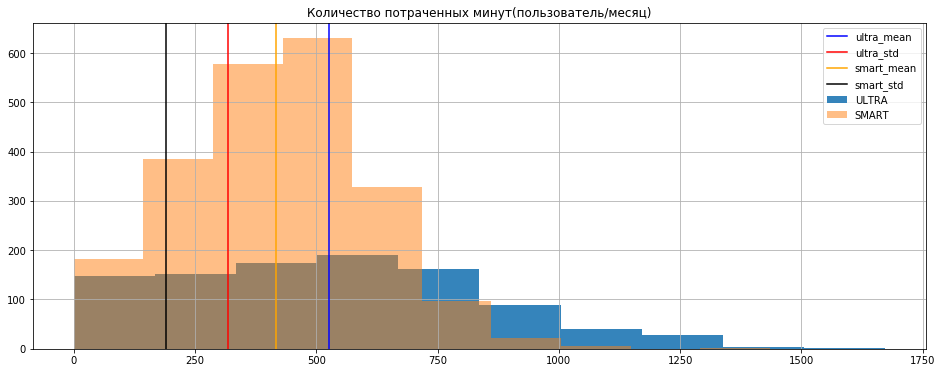

In [177]:
ax1=ultra_calls['duration_rounded'].hist(alpha=0.9,grid=True,label='ULTRA',figsize=(16,6))
ax2=smart_calls['duration_rounded'].hist(alpha=0.5,grid=True,label='SMART',figsize=(16,6))
ax1.set_title('Количество потраченных минут(пользователь/месяц)')

ax1.axvline(ultra_calls['duration_rounded'].mean(), c='blue',label='ultra_mean')
ax1.axvline(np.std(ultra_calls['duration_rounded'],ddof=1),c='red',label='ultra_std')
ax2.axvline(smart_calls['duration_rounded'].mean(), c='orange',label='smart_mean')
ax2.axvline(np.std(smart_calls['duration_rounded'],ddof=1), c='black',label='smart_std')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Пользователи ультра больше говорят в среднем на 100 минут больше,стандартные отклонения примерно одинаковы 

std-standart_deviation-стандартное отклоение

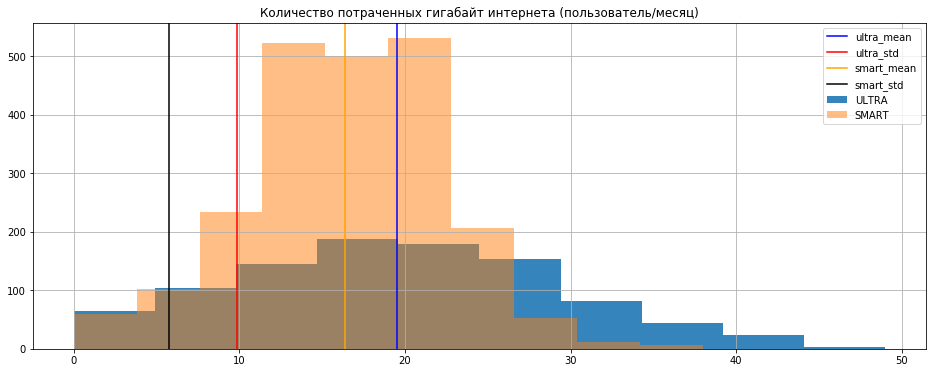

In [178]:
ax1=ultra_calls['gb_used'].hist(alpha=0.9,grid=True,label='ULTRA',figsize=(16,6))
ax2=smart_calls['gb_used'].hist(alpha=0.5,grid=True,label='SMART',figsize=(16,6))
ax1.set_title('Количество потраченных гигабайт интернета (пользователь/месяц)')

ax1.axvline(ultra_calls['gb_used'].mean(), c='blue',label='ultra_mean')
ax1.axvline(np.std(ultra_calls['gb_used'],ddof=1),c='red',label='ultra_std')
ax2.axvline(smart_calls['gb_used'].mean(), c='orange',label='smart_mean')
ax2.axvline(np.std(smart_calls['gb_used'],ddof=1), c='black',label='smart_std')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

смарт пользователи трятят меньше интернета чем пользователи ультра прмерно на 3-4 гигабайта

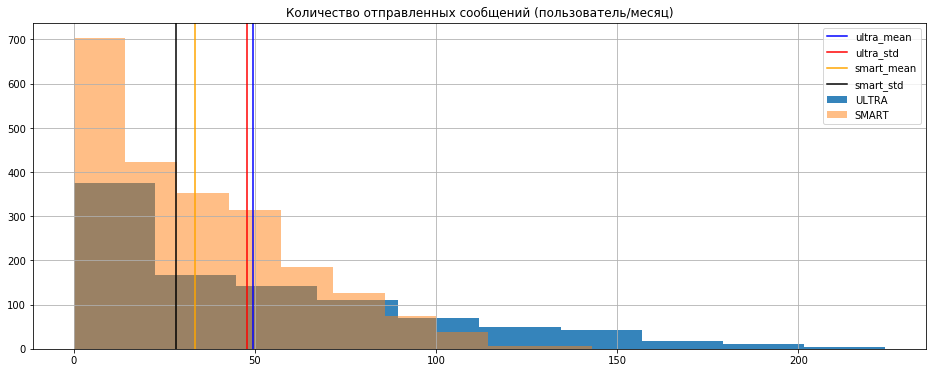

In [185]:
ax1=ultra_calls['messages'].hist(alpha=0.9,grid=True,label='ULTRA',figsize=(16,6))
ax2=smart_calls['messages'].hist(alpha=0.5,grid=True,label='SMART',figsize=(16,6))
ax1.set_title('Количество отправленных сообщений (пользователь/месяц)')

ax1.axvline(ultra_calls['messages'].mean(), c='blue',label='ultra_mean')
ax1.axvline(np.std(ultra_calls['messages'],ddof=1),c='red',label='ultra_std')
ax2.axvline(smart_calls['messages'].mean(), c='orange',label='smart_mean')
ax2.axvline(np.std(smart_calls['messages'],ddof=1), c='black',label='smart_std')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')

среднее у пользователей смарт меньше,отклонение больше, а у пользователей ултра наоборот

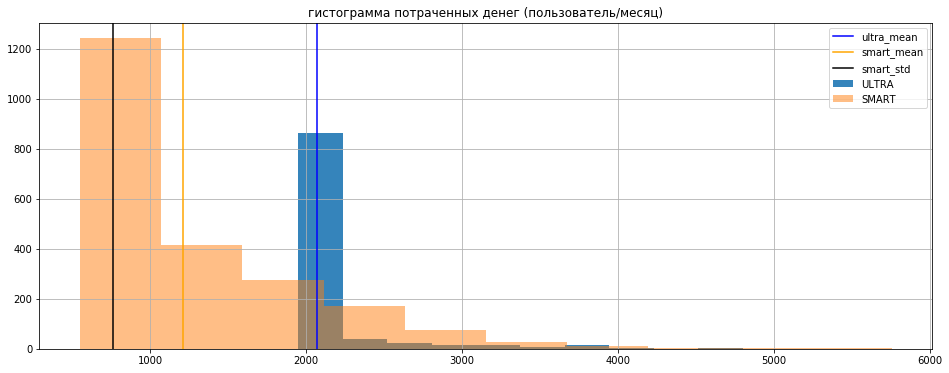

In [187]:
ax1=ultra_calls['final_price'].hist(alpha=0.9,grid=True,label='ULTRA',figsize=(16,6))
ax2=smart_calls['final_price'].hist(alpha=0.5,grid=True,label='SMART',figsize=(16,6))
ax1.set_title('гистограмма потраченных денег (пользователь/месяц)')

ax1.axvline(ultra_calls['final_price'].mean(), c='blue',label='ultra_mean')

ax2.axvline(smart_calls['final_price'].mean(), c='orange',label='smart_mean')
ax2.axvline(np.std(smart_calls['final_price'],ddof=1), c='black',label='smart_std')
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

отклонение у ультра нам не особо нужно, а вот тк мы видим разницу в количествах пользователей по тарифам

желтая линия-среднее,красная-стандартное отклонение

Распределения у тарифа ультра следущие:Нормальное и 2 пуассоновских

Моежем сделать вывод, что смарт все в среднем делает больше, смс отправляет пользуется интернетом и говорит, в то время как пользователи ультра тратят 1950 рублей и в итоге в среднем используют всего меньше,а платят больше.

Самих юзеров тарифа SMART больше,среднее по оплате составляет примерно 1200 рублей

## Шаг 4 проверка гипотез


Мы получили численные данные всех нужных нам переменных и нас интересует первая часть для выдвижения гипотез.

гипотеза номер 0:средняя выручка пользователей тарифов «Ультра» и «Смарт»  не различается;

в качестве нулевой H0=возьмем ее

тогда H1=средняя выручка пользователей тарифов «Ультра» и «Смарт»  различается;

так как значений мало то мы возьмем уровень статистической значимости alpha=0.01 чтоб подтвердить точность

для проверки гипотез использовал критерий стьюдента 

Берем среднее из тарифа ультра и сравниваем по смарту.

In [201]:
np.var(x)

143345.5641732588

In [202]:
np.var(y)

578490.8397008236

In [228]:
st.levene(x.dropna(), y.dropna())

LeveneResult(statistic=544.7454697674708, pvalue=1.9991317039544977e-111)

p-значение для теста левина <0.05 ,следовательно равеноство десперсий отсутсвует

In [203]:
x=df_1.loc[df_1['tariff']=='ultra', 'final_price']
y=df_1.loc[df_1['tariff']=='smart', 'final_price']

alpha=0.01

results = st.ttest_ind(x,y,equal_var=False)
print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.16970832e-315
Отвергаем нулевую гипотезу


Проверка двухсторонняя так как мы можем наблюдать различия как на увеличение так и на уменьшение,так как поведение цены может быть разнным

Так как мы отввергаем нулевую гипотезу из этого делаем вывод что в ход идет альтернативная, что средняя выручка отличается между тарифами в пользу смарта

#### перейдем ко второй части вопроса:

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

средняя выручка пользователей из Москвы НЕ ОТЛИЧАЕТСЯ от выручки пользователей из других регионов- наша нулевая гипотеза

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов- наша нулевая гипотеза- альтернативная

соединим таблицы для получения значений:

In [191]:
df_1

,user_id,gb_used,duration_rounded,messages,tariff,month_start,month_payment,rub_monthly_fee,final_price
0,1000,3.0,159,22,ultra,5,1,1950,1950.0
1,1000,23.0,172,60,ultra,5,1,1950,1950.0
2,1000,14.0,340,75,ultra,5,1,1950,1950.0
3,1000,14.0,408,81,ultra,5,1,1950,1950.0
4,1000,15.0,466,57,ultra,5,1,1950,1950.0
...,...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,smart,7,1,550,1750.0
3210,1499,2.0,70,11,smart,9,1,550,550.0
3211,1499,18.0,449,48,smart,9,1,550,1150.0
3212,1499,18.0,612,59,smart,9,1,550,1289.0


In [192]:
df_users

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,month_start
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5
...,...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra,8
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart,1
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart,10
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart,7


In [204]:
df_final_task_2=df_1.merge(df_users,on='user_id',how='left')

In [205]:
df_final_task_2=df_final_task_2.drop(['age','last_name','first_name','reg_date','tariff_y','month_start_y','churn_date'],axis=1)

In [206]:
df_final_task_2

,user_id,gb_used,duration_rounded,messages,tariff_x,month_start_x,month_payment,rub_monthly_fee,final_price,city
0,1000,3.0,159,22,ultra,5,1,1950,1950.0,Краснодар
1,1000,23.0,172,60,ultra,5,1,1950,1950.0,Краснодар
2,1000,14.0,340,75,ultra,5,1,1950,1950.0,Краснодар
3,1000,14.0,408,81,ultra,5,1,1950,1950.0,Краснодар
4,1000,15.0,466,57,ultra,5,1,1950,1950.0,Краснодар
...,...,...,...,...,...,...,...,...,...,...
3209,1498,21.0,247,42,smart,7,1,550,1750.0,Владикавказ
3210,1499,2.0,70,11,smart,9,1,550,550.0,Пермь
3211,1499,18.0,449,48,smart,9,1,550,1150.0,Пермь
3212,1499,18.0,612,59,smart,9,1,550,1289.0,Пермь


In [207]:
x_1=df_final_task_2.loc[df_final_task_2['city']=='Москва', 'final_price']
y_1=df_final_task_2.loc[df_final_task_2['city']!='Москва', 'final_price']
print(x_1.mean(),y_1.mean())



1500.9558101472994 1468.7625816365733


In [225]:
st.levene(x_1.dropna(), y_1.dropna())

LeveneResult(statistic=2.825592521890725, pvalue=0.09286987442880296)

p>0.5 equal_variences= True

In [227]:
x_1=df_final_task_2.loc[df_final_task_2['city']=='Москва', 'final_price']
y_1=df_final_task_2.loc[df_final_task_2['city']!='Москва', 'final_price']


alpha=0.05

results = st.ttest_ind(x_1,y_1,equal_var=True)
print('p-значение:',results.pvalue)

if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.35624246322259046
Не получилось отвергнуть нулевую гипотезу


цифры средних значений говорят сами за себя: 1500.9 1468.76 =>верояности попаданий одних значений в совокупность других довольно высокая,а значит отвергать гипотезу что "средняя выручка пользователей из Москвы НЕ ОТЛИЧАЕТСЯ "- мы не можем так как она не отличается)

# Общий вывод

######  Мы исследовали два тарифа для мегалайна.
---
Чтобы это провести успешно мы сделали следующие операции:
- 1)Предобработали данные с нужных нам таблиц для сведения всей информации в одну общую
- 2)Нашли общую сумму ежемесячных платежей для всех 500 пользователей 
- 3)Сравнили и проанализировали эти два тарифа при помощи графиков(как выяснилось, несмотря на то что пользователи тарифа Ultra всеми возможностями пользуются больше,количество пользователей тарифа смарт больше. 
- 4)Проверили статистическую гипотезу на ревеноству средней выручки.
- 5)Проверили гипотезу о равенстве выручки по регионам
--- 
##### Пришли к следующим выводам:
- Тариф "ультра" изначально с высокой  стоимостью и  в ходе исследования выяснили,что им пользовалось примерно 30 процентов.
- В то время как тарифом "смарт"-70%
- в ходе проверки гипотез статистического анализа к выводам что выручка разная, и тариф смарт-выгоднее 
- проверили зависимость выручки от городов и выяснили что прямой зависимости по регионам нет, а среди пользователей также популярен смарт
- Рекламной кампании предлагается сделать упор на тариф смарт так как он в среднем дешевле рублей(550 старт,среднее среди всех оплат=1200),а использование сообщений интернета и разговоров не так сильно отличается от пользователей тарифа ультра,стоимостью 1950 рублей